Importing necessary packages

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
import warnings
warnings.filterwarnings("ignore")

Loading the dataset and preprocessing

In [112]:
# Load the CSV files
data_train = pd.read_csv('training_backup.csv')
data_test = pd.read_csv('testing_backup.csv')
augmented_data = pd.read_csv('augmented_lyrics.csv')

# Combine both dataframes
frames = [data_train, data_test, augmented_data]
data = pd.concat(frames)

data = data.sample(frac = 1)

In [113]:
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text
def preprocess_text(text):

    text = text.lower()

    # Remove numbers and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    doc = nlp(text)

    lemmatized = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]

    return " ".join(lemmatized)

In [116]:
# Apply preprocessing to the text
data['lyrics'] = data['lyrics'].apply(preprocess_text)

In [117]:
mood_labels = ['Happy', 'Sad', 'Angry', 'Relaxed']
mood_mapping = {1: 'Happy', 2: 'Sad', 3: 'Angry', 4: 'Relaxed'}

# Map the numerical codes to mood labels in a new column
data['mood_label'] = data['mood'].map(mood_mapping)

# Count the occurrences of each mood label
mood_counts = data['mood_label'].value_counts().reindex(mood_labels)

print(mood_counts)

Happy      547
Sad        586
Angry      318
Relaxed    365
Name: mood_label, dtype: int64


Visualizing of dataset

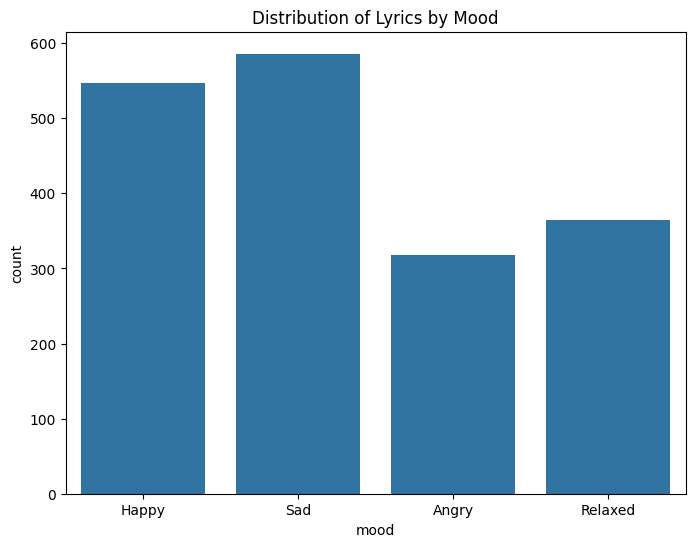

In [118]:
# Visualize the distribution of classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='mood', data=data)

plt.title('Distribution of Lyrics by Mood')
ax.set_xticklabels(mood_labels)

plt.show()

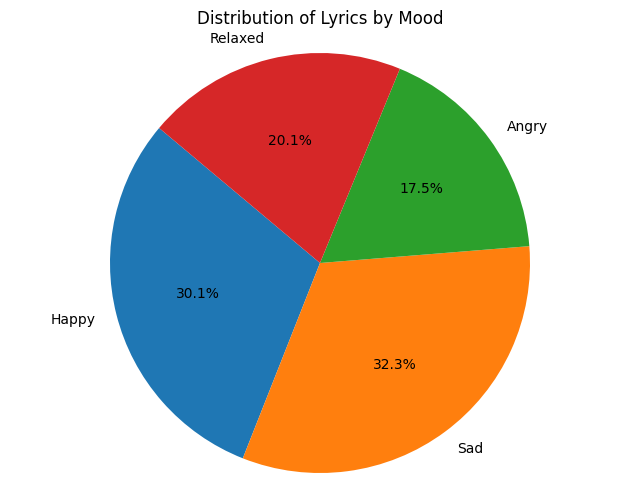

In [119]:
# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(mood_counts, labels=mood_labels, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Lyrics by Mood')
plt.axis('equal')

plt.show()

Word Cloud Representation For each mood

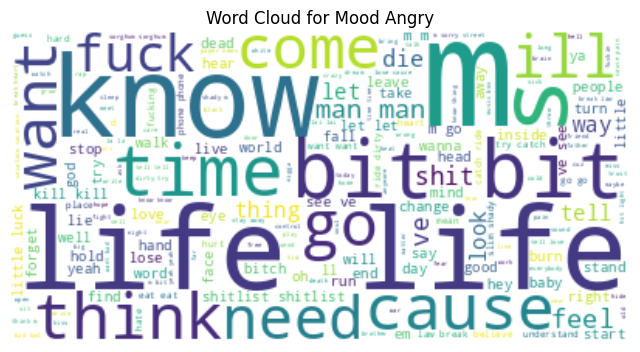

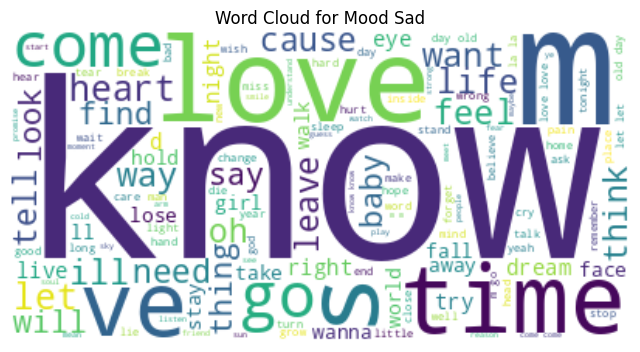

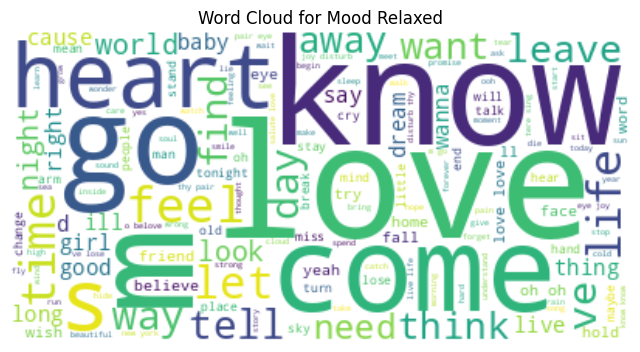

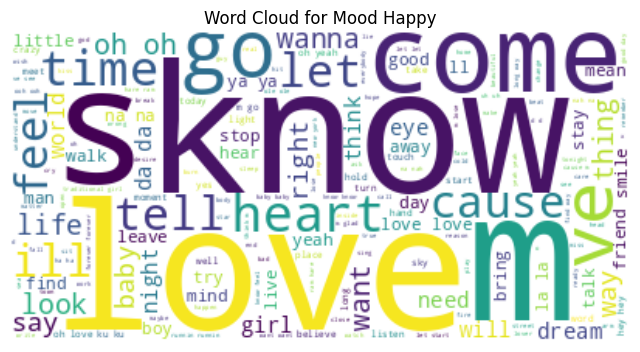

In [120]:
from wordcloud import WordCloud

for mood in data['mood'].unique():
    subset = data[data['mood'] == mood]
    text = " ".join(lyric for lyric in subset.lyrics)
    wordcloud = WordCloud(background_color="white").generate(text)

    # Display the generated image
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Mood {mood_labels[mood-1]}")
    plt.show()

Baseline models with various vectorization methods

In [121]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function for evaluation
def train_evaluate_model(model, vectorizer, data):

    # Select the vectorizer
    if vectorizer == 'count':
      vectorizer = CountVectorizer()
    elif vectorizer == 'tfidf':
      vectorizer = TfidfVectorizer()
    else:
      return

    X = vectorizer.fit_transform(data['lyrics'])
    y = data['mood']

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print the results
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=mood_labels, yticklabels=mood_labels)
    plt.ylabel('Actual Mood')
    plt.xlabel('Predicted Mood')
    plt.show()


Training the baseline models with TF-IDF Vectorizer


The results for NB Model
Accuracy: 0.3983516483516483
Precision: 0.696153269807116
Recall: 0.3983516483516483
F1 Score: 0.30730854565246835


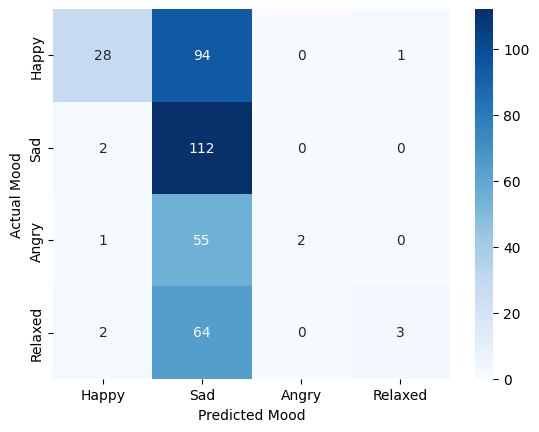

In [122]:
# Naive Bayes Model
print("The results for NB Model")
nb_model = MultinomialNB()
train_evaluate_model(nb_model, 'tfidf', data)

The results for SVM Model
Accuracy: 0.4945054945054945
Precision: 0.5609261808285774
Recall: 0.4945054945054945
F1 Score: 0.4621010667301183


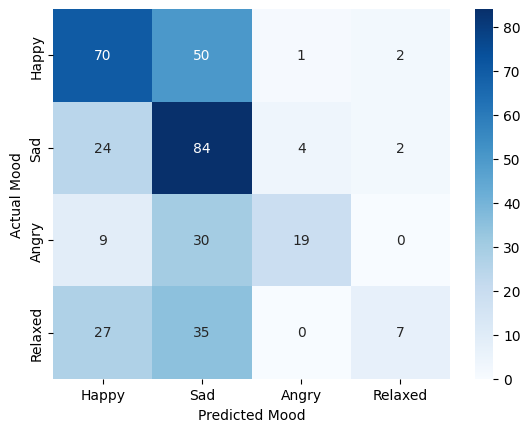

In [123]:
# SVM Model
print("The results for SVM Model")
svm_model = SVC()
train_evaluate_model(svm_model,'tfidf', data)

The results for LR Model
Accuracy: 0.5082417582417582
Precision: 0.5128359955848644
Recall: 0.5082417582417582
F1 Score: 0.4894081737718879


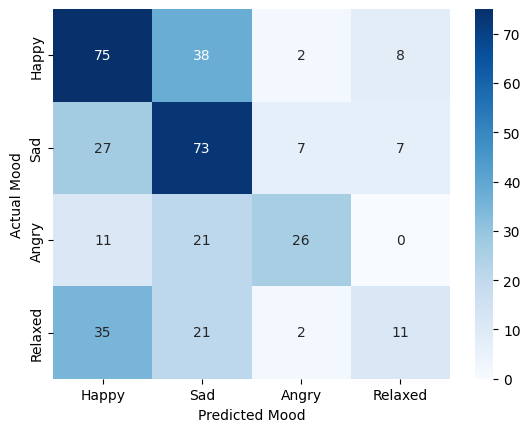

In [124]:
# Logistic Regression
print("The results for LR Model")
lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)
train_evaluate_model(lr_model,'tfidf', data)

The results for Random Forest Classifier
Accuracy: 0.5082417582417582
Precision: 0.5128359955848644
Recall: 0.5082417582417582
F1 Score: 0.4894081737718879


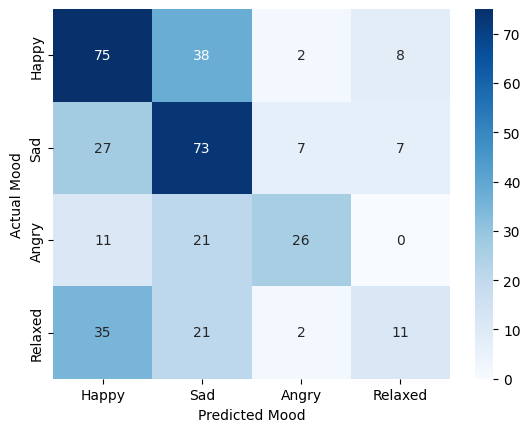

In [125]:
# Random Forest Classifier
print("The results for Random Forest Classifier")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(lr_model,'tfidf', data)

Training the baseline models with Count Vectorization

The results for NB Model
Accuracy: 0.4835164835164835
Precision: 0.5026710708207109
Recall: 0.4835164835164835
F1 Score: 0.47450594758650483


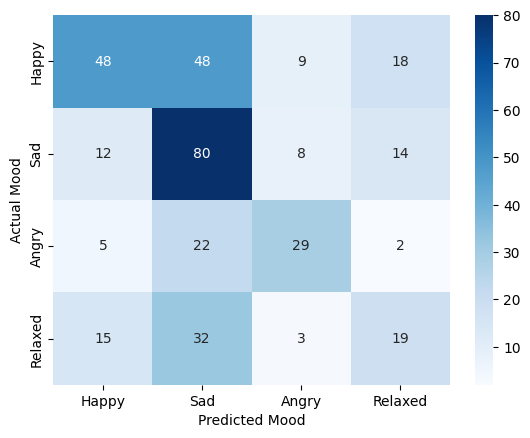

In [126]:
# Naive Bayes Model
print("The results for NB Model")
nb_model = MultinomialNB()
train_evaluate_model(nb_model, 'count', data)


The results for SVM Model
Accuracy: 0.40934065934065933
Precision: 0.47657695665860256
Recall: 0.40934065934065933
F1 Score: 0.34654464006313596


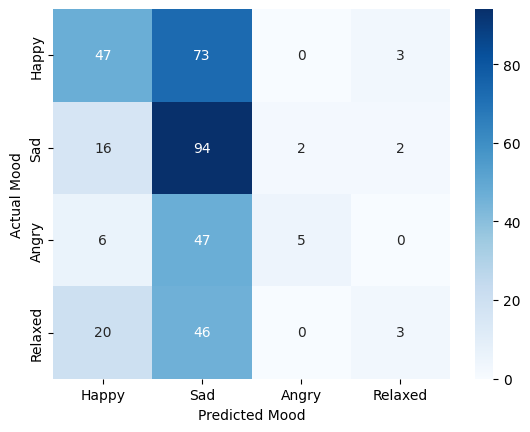

In [127]:
# SVM Model
print("The results for SVM Model")
svm_model = SVC()
train_evaluate_model(svm_model,'count', data)

The results for LR Model
Accuracy: 0.46703296703296704
Precision: 0.4694500877273986
Recall: 0.46703296703296704
F1 Score: 0.46753665990629734


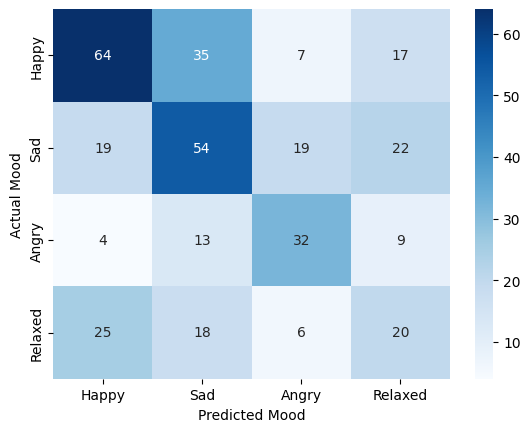

In [128]:
# Logistic Regression
print("The results for LR Model")
lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)
train_evaluate_model(lr_model,'count', data)

The results for Random Forest Model
Accuracy: 0.46703296703296704
Precision: 0.4694500877273986
Recall: 0.46703296703296704
F1 Score: 0.46753665990629734


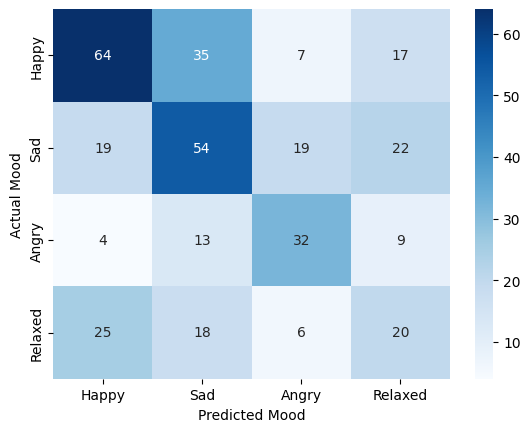

In [129]:
# Random Forest
print("The results for Random Forest Model")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(lr_model,'count', data)

Training Advanced Models

LSTM with GloVe embeddings

In [130]:
import numpy as np

def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_embeddings = load_glove_embeddings('glove.6B.100d.txt')


In [131]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['lyrics'])
sequences = tokenizer.texts_to_sequences(data['lyrics'])

# Padding sequences to ensure uniform input size
max_sequence_length = max(len(x) for x in sequences)
word_index = tokenizer.word_index
data_padded = pad_sequences(sequences, maxlen=max_sequence_length)


In [132]:
embedding_dim = 100  # Assuming we're using GloVe 100d embeddings
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


In [133]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(len(word_index) + 1, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # Assuming 4 mood classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [134]:
from keras.utils import to_categorical

y = to_categorical(data['mood'] - 1)  # Assuming mood labels are 1-indexed

X_train, X_val, y_train, y_val = train_test_split(data_padded, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
12/12 [==============================] - 43s 3s/step - loss: 1.3765 - accuracy: 0.3168 - val_loss: 1.3127 - val_accuracy: 0.3434
Epoch 2/10
12/12 [==============================] - 54s 5s/step - loss: 1.3197 - accuracy: 0.3561 - val_loss: 1.3102 - val_accuracy: 0.3929
Epoch 3/10
12/12 [==============================] - 32s 3s/step - loss: 1.2853 - accuracy: 0.4112 - val_loss: 1.2574 - val_accuracy: 0.4176
Epoch 4/10
12/12 [==============================] - 32s 3s/step - loss: 1.2331 - accuracy: 0.4311 - val_loss: 1.3056 - val_accuracy: 0.3874
Epoch 5/10
12/12 [==============================] - 33s 3s/step - loss: 1.2123 - accuracy: 0.4470 - val_loss: 1.1917 - val_accuracy: 0.4258
Epoch 6/10
12/12 [==============================] - 35s 3s/step - loss: 1.1722 - accuracy: 0.4828 - val_loss: 1.2115 - val_accuracy: 0.3874
Epoch 7/10
12/12 [==============================] - 35s 3s/step - loss: 1.1366 - accuracy: 0.4890 - val_loss: 1.1912 - val_accuracy: 0.4176
Epoch 8/10
12/12 [==

In [135]:
y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_val, axis=1)

12/12 [==============================] - 2s 181ms/step


In [136]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.3983516483516483
Precision: 0.4286587380792555
Recall: 0.3983516483516483
F1 Score: 0.3893876305321459


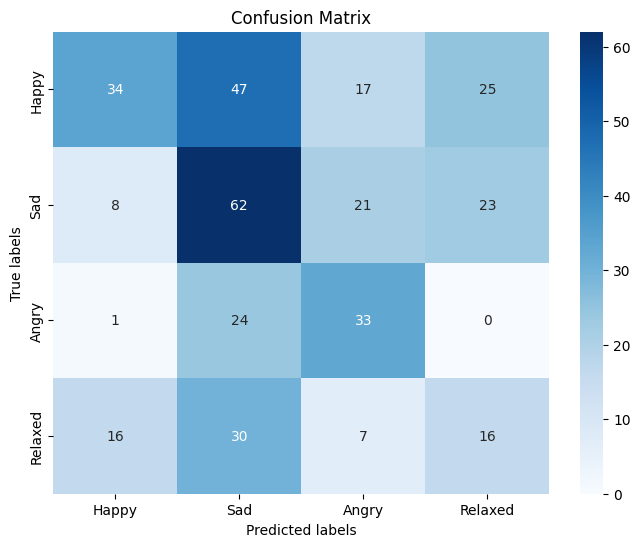

In [137]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Happy', 'Sad', 'Angry', 'Relaxed'], yticklabels=['Happy', 'Sad', 'Angry', 'Relaxed'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

DistilBERT

In [138]:
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments

label_encoder = LabelEncoder()
data['mood_encoded'] = label_encoder.fit_transform(data['mood'])  # Convert mood labels from 1-4 to 0-3

# Splitting the dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(data['lyrics'], data['mood_encoded'], test_size=0.2)


In [139]:
from google.colab import userdata
userdata.get('Huggingface')
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)


In [140]:
import torch

class LyricsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = LyricsDataset(train_encodings, list(train_labels))
val_dataset = LyricsDataset(val_encodings, list(val_labels))


In [141]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=4)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [142]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }


In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=3,              # Total number of training epochs
    per_device_train_batch_size=8,   # Batch size per device during training
    per_device_eval_batch_size=8,    # Batch size for evaluation
    warmup_steps=500,                # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer.train()


In [ ]:
trainer.evaluate()

In [ ]:
predictions = trainer.predict(val_dataset)

In [ ]:
from scipy.special import softmax

logits = predictions.predictions
probabilities = softmax(logits, axis=1)
pred_labels = np.argmax(probabilities, axis=1)


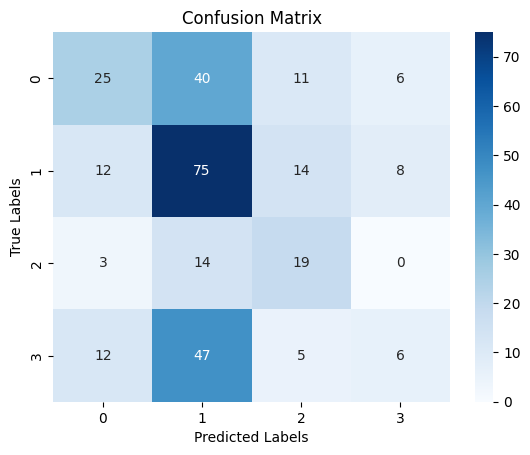

In [ ]:
cm = confusion_matrix(val_labels, pred_labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
